## Exploratory data analysis: Lead role gender in movies 

Dataset contains information about speaking roles for a number of movies, including basic information about each movie and its actors. 

In [1]:
# Import packages to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import seaborn as sns

sns.set_theme()


### Data loading, preparation and basic inspection

Make sure that data is complete and is in a good format to work with.

In [3]:
# Load and inspect dataframe

df_actors = pd.read_csv("../data/train.csv")
df_actors.head(10)

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male
5,1492,5872,1491.0,994,11,1997,4,2889,327.0,45.909091,36.500000,55.0,41.0,Male
6,1500,5322,1191.0,287,6,1980,3,2631,269.0,47.000000,24.500000,61.0,25.0,Male
7,349,6098,2692.0,2472,9,1988,2,3057,53.0,43.000000,31.000000,48.0,31.0,Male
8,857,8851,4042.0,3476,13,2001,2,3952,89.0,47.416667,28.500000,33.0,27.0,Male
9,2619,9626,1604.0,869,9,1973,6,5403,565.0,26.500000,22.000000,20.0,26.0,Male


In [4]:
# Shape
df_actors.shape

(1039, 14)

In [5]:
# Summary statistics
df_actors.describe()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead
count,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000,1039.000000
mean,2334.256015,11004.368624,4108.256978,2525.024062,7.767084,1999.862368,3.507218,4561.855630,111.149182,42.353766,35.929588,38.716073,35.486044
std,2157.216744,6817.397413,2981.251156,2498.747279,3.901439,10.406632,2.088526,3417.855987,151.761551,7.817110,8.957193,12.285902,12.046696
min,0.000000,1351.000000,318.000000,1.000000,1.000000,1939.000000,1.000000,0.000000,0.000000,19.000000,11.000000,11.000000,7.000000
25%,904.000000,6353.500000,2077.000000,814.500000,5.000000,1994.000000,2.000000,2139.500000,22.000000,37.480769,29.500000,30.000000,28.000000
50%,1711.000000,9147.000000,3297.000000,1834.000000,7.000000,2000.000000,3.000000,3824.000000,60.000000,42.600000,35.000000,38.000000,34.000000
75%,3030.500000,13966.500000,5227.000000,3364.000000,10.000000,2009.000000,5.000000,5887.500000,143.500000,47.333333,41.500000,46.000000,41.000000
max,17658.000000,67548.000000,28102.000000,25822.000000,29.000000,2015.000000,16.000000,31146.000000,1798.000000,71.000000,81.333333,81.000000,85.000000


In [6]:
# Check that dataset is OK

zero_values = (df_actors.drop(columns="Lead") == 0).sum().sum()
negative_values = (df_actors.drop(columns="Lead") < 0).sum().sum()

print(df_actors.isnull().any())
print("\n")
print(f"Number of negative values: {negative_values}")
print("\n")
print(f"Number of zero values: {negative_values}")

Number words female                     False
Total words                             False
Number of words lead                    False
Difference in words lead and co-lead    False
Number of male actors                   False
Year                                    False
Number of female actors                 False
Number words male                       False
Gross                                   False
Mean Age Male                           False
Mean Age Female                         False
Age Lead                                False
Age Co-Lead                             False
Lead                                    False
dtype: bool


Number of negative values: 0


Number of zero values: 0


### Basic visualization of data

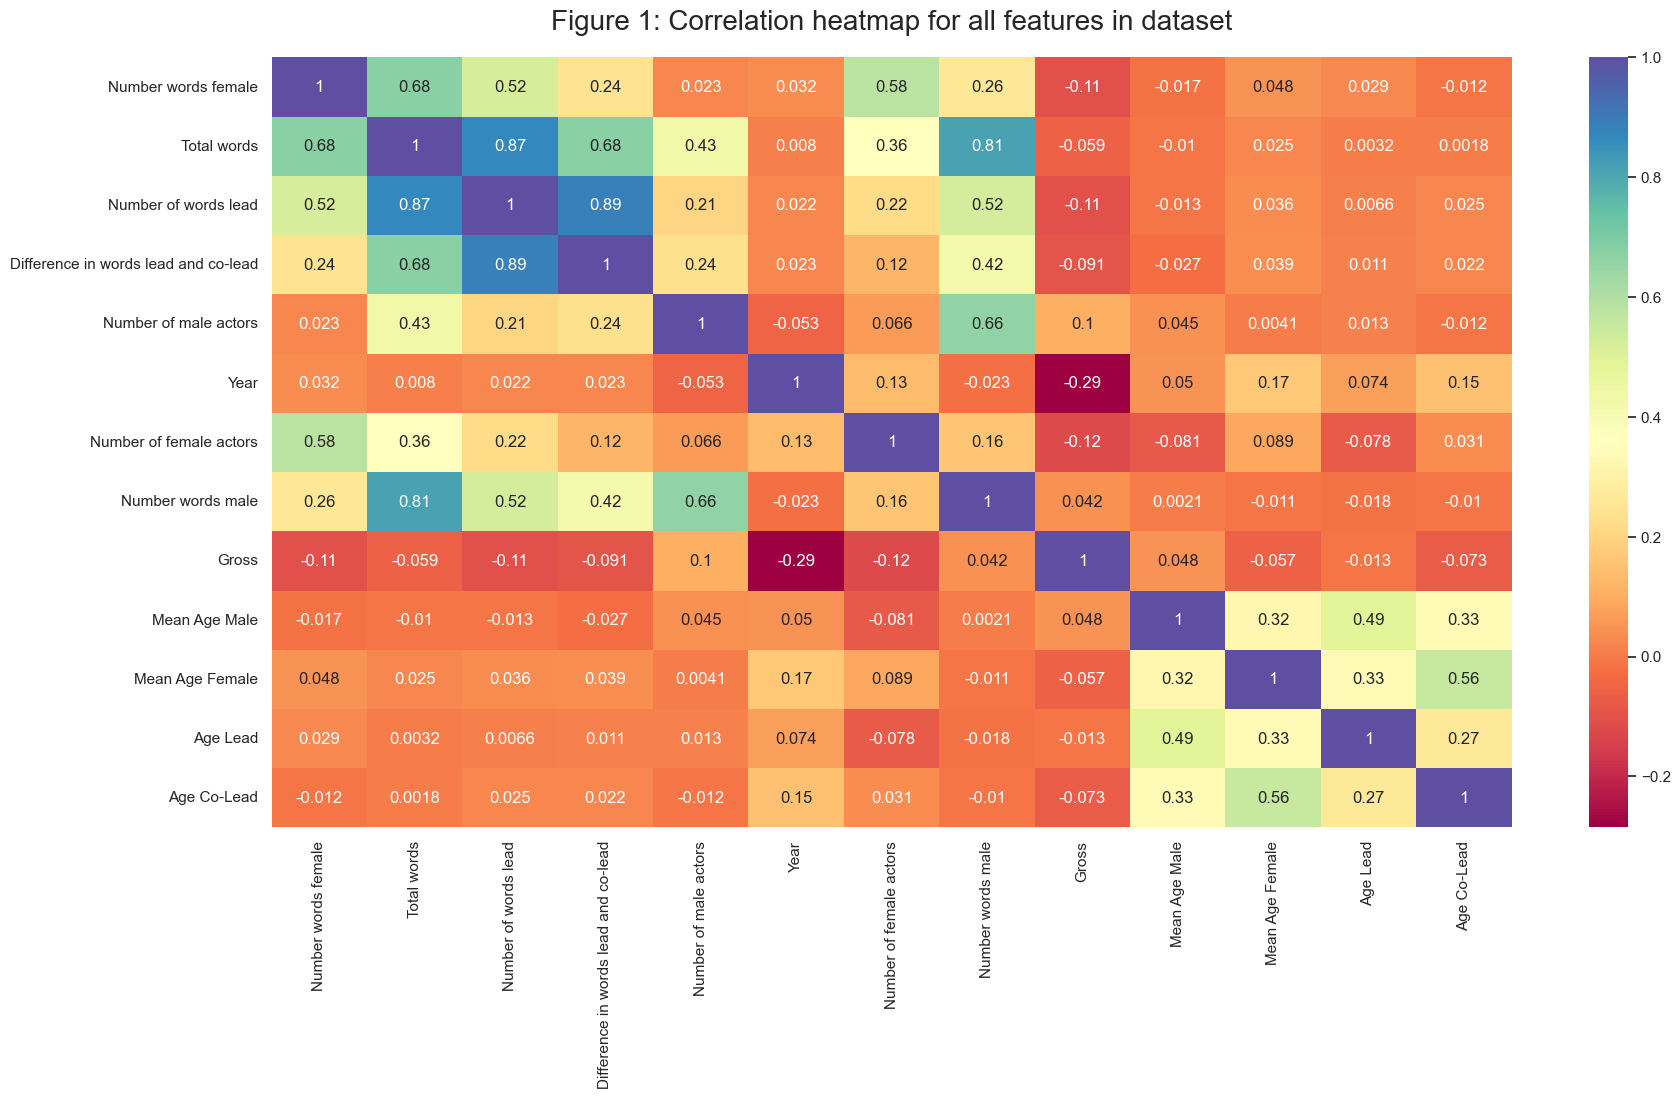

In [7]:
# Plot correlation values in heatmap

plt.figure(figsize=(20, 10))
actors_corr = df_actors.corr()
sns.heatmap(actors_corr, annot=True, cmap="Spectral")
plt.title(
    "Figure 1: Correlation heatmap for all features in dataset", fontsize=20, pad=20
)

print()
plt.show()

Several features with high correlation, which is something to be aware of and watch out for when doing the modeling, to avoid strong co-linearity of features.

### Question 1: Do men or women dominate speaking roles in Hollywood movies?

In [90]:
# Additional variables used for analysis

# Calculate gender word shares
df_actors["Female word share"] = (
    df_actors["Number words female"] / df_actors["Total words"]
)
df_actors["Male word share"] = 1 - df_actors["Female word share"]

# Calculate gender actor shares
df_actors["Total actors"] = (
    df_actors["Number of female actors"] + df_actors["Number of male actors"]
)
df_actors["Female actor share"] = (
    df_actors["Number of female actors"] / df_actors["Total actors"]
)
df_actors["Male actor share"] = 1 - df_actors["Female actor share"]

# Create numeric class column
df_actors["Lead"] = df_actors["Lead"].astype("category")
df_actors["Lead numeric"] = df_actors["Lead"].cat.codes

#### 1.1 Share of female words and female actors across all movies

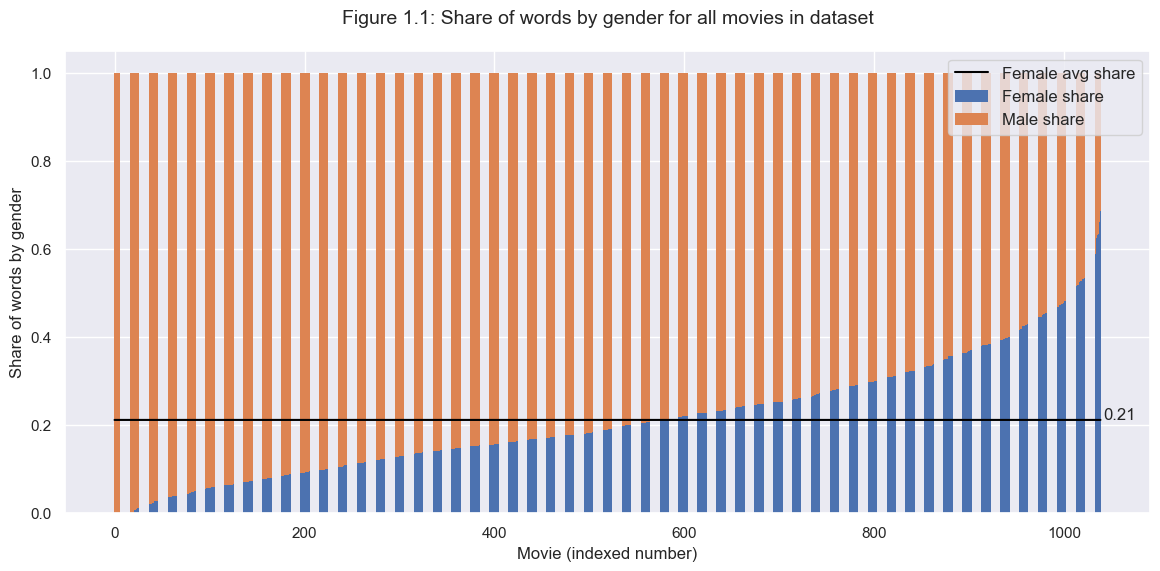

In [30]:
# Share of female and male words for each movie
# TODO: Add average value label

# Sort values and create list of movie indices
df_gender_share = df_actors.copy()
df_gender_share = df_gender_share.sort_values(by="Female word share", ascending=True)
movie_index = df_actors.index.values.tolist()

# PLot the results
plt.figure(figsize=(14, 6))
plt.bar(movie_index, df_gender_share["Female word share"], width=0.5, linewidth=0)
plt.bar(
    movie_index,
    df_gender_share["Male word share"],
    bottom=df_gender_share["Female word share"],
    width=0.5,
    linewidth=0,
)

# Plot average female share line
avg_female_share = df_gender_share["Female word share"].mean()
plt.plot(
    movie_index, [avg_female_share for i in range(len(movie_index))], color="black"
)
plt.annotate(
    str(round(avg_female_share, 2)), xy=(len(movie_index) + 2, avg_female_share)
)

# Format the chart
plt.title(
    "Figure 1.1: Share of words by gender for all movies in dataset",
    fontsize=14,
    pad=20,
)
plt.xlabel("Movie (indexed number)", fontsize=12)
plt.ylabel("Share of words by gender", fontsize=12)
plt.legend(["Female avg share", "Female share", "Male share"], fontsize=12)

print()
plt.show()

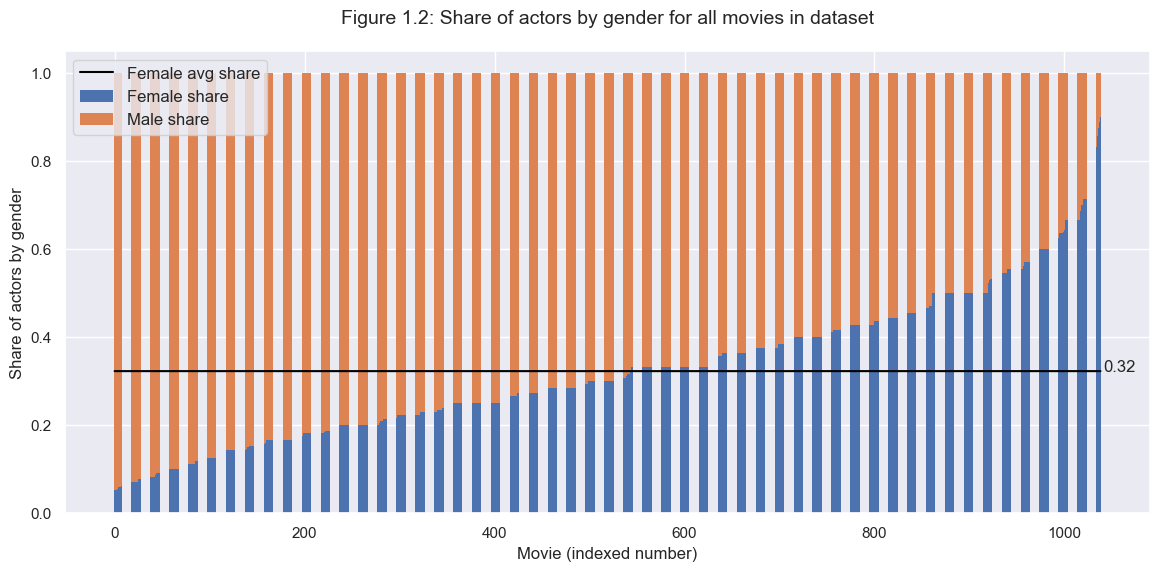

In [29]:
# Share of female and male actors

# Sort values and create list of movie indices
df_actor_share = df_actors.copy()
df_actor_share = df_actor_share.sort_values(by="Female actor share", ascending=True)
movie_index = df_actors.index.values.tolist()

# PLot the results
plt.figure(figsize=(14, 6))
plt.bar(movie_index, df_actor_share["Female actor share"], width=0.5, linewidth=0)
plt.bar(
    movie_index,
    df_actor_share["Male actor share"],
    bottom=df_actor_share["Female actor share"],
    width=0.5,
    linewidth=0,
)


# Plot average female share line
avg_female_actor_share = df_actor_share["Female actor share"].mean()
plt.plot(
    movie_index,
    [avg_female_actor_share for i in range(len(movie_index))],
    color="black",
)
plt.annotate(
    str(round(avg_female_actor_share, 2)),
    xy=(len(movie_index) + 2, avg_female_actor_share),
)

# Format the chart
plt.title(
    "Figure 1.2: Share of actors by gender for all movies in dataset",
    fontsize=14,
    pad=20,
)
plt.xlabel("Movie (indexed number)", fontsize=12)
plt.ylabel("Share of actors by gender", fontsize=12)
plt.legend(["Female avg share", "Female share", "Male share"], fontsize=12)

print()
plt.show()

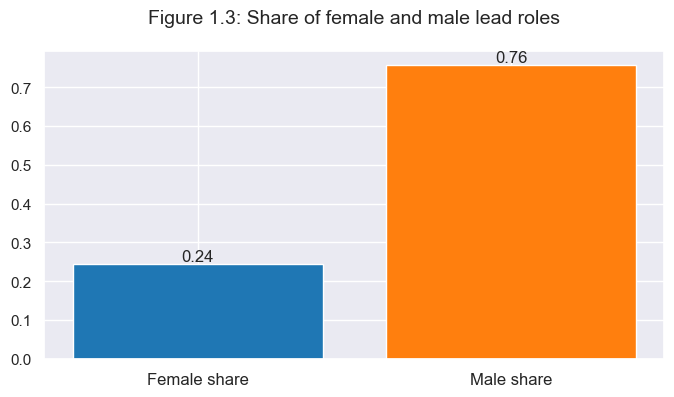

In [28]:
# Share of male and female lead roles

# Calculate share across all movies
male_share = df_actors["Lead numeric"].sum() / df_actors["Lead numeric"].count()
female_share = 1 - male_share

# Create bar chart
plt.figure(figsize=(8, 4))
p1 = plt.bar(
    ["Female share", "Male share"],
    [female_share, male_share],
    color=["tab:blue", "tab:orange"],
)
plt.title(
    "Figure 1.3: Share of female and male lead roles",
    fontsize=14,
    pad=20,
)
plt.xticks(fontsize=12)
plt.bar_label(p1, label_type="edge", fmt="%.2f")

print()
plt.show()

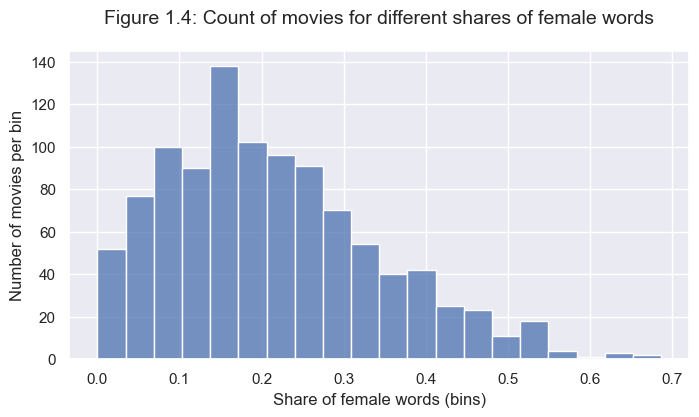

In [27]:
# Create histogram of female share of words
# TODO: Add counts / % to bars
# TODO: Format x labels as %

plt.figure(figsize=(8, 4))
sns.histplot(df_gender_share["Female word share"], bins=20)

# Format the chart
plt.title(
    "Figure 1.4: Count of movies for different shares of female words",
    fontsize=14,
    pad=20,
)
plt.xlabel("Share of female words (bins)", fontsize=12)
plt.ylabel("Number of movies per bin", fontsize=12)

print()
plt.show()

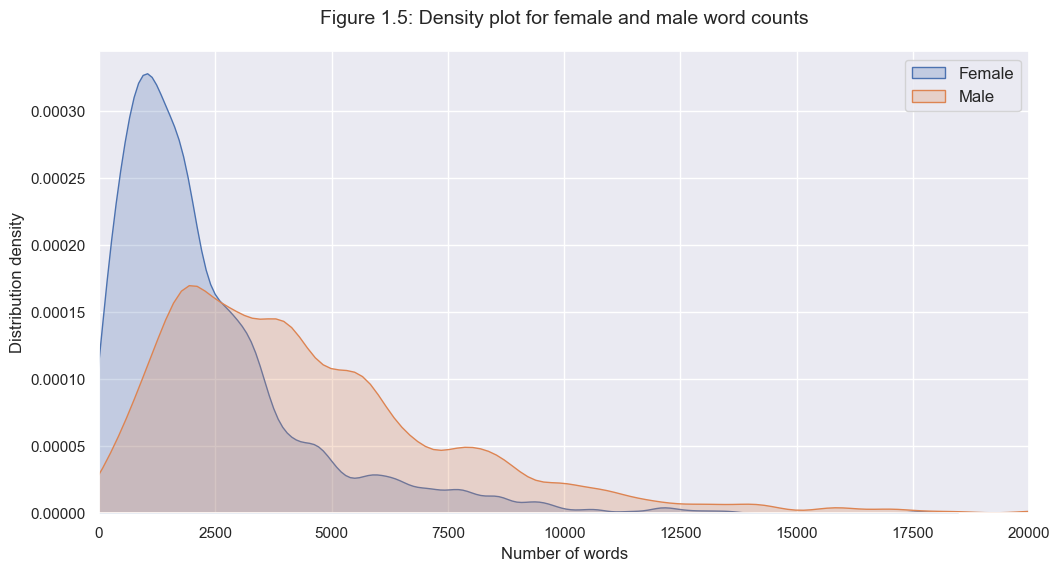

In [33]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df_actors["Number words female"], fill=True, bw_adjust=0.5)
sns.kdeplot(df_actors["Number words male"], fill=True, bw_adjust=0.5)

# Formatting
plt.title(
    "Figure 1.5: Density plot for female and male word counts", fontsize=14, pad=20
)
plt.xlabel("Number of words", fontsize=12)
plt.xlim(0, 20000)
plt.ylabel("Distribution density", fontsize=12)
plt.legend(["Female", "Male"], fontsize=12)

print()
plt.show()

### Question 2: Has gender balance in speaking roles changed over time (i.e. years)?

In [34]:
# Calculate average word share by year
df_share_by_year = pd.DataFrame(
    df_actors.groupby("Year")[
        [
            "Female word share",
            "Male word share",
            "Female actor share",
            "Male actor share",
        ]
    ]
    .mean()
    .reset_index()
)

df_lead_by_year = pd.DataFrame(
    df_actors.groupby("Year")["Lead numeric"]
    .mean()
    .reset_index()
    .rename(columns={"Lead numeric": "Male lead share"})
)

df_share_by_year = df_share_by_year.join(df_lead_by_year.set_index("Year"), on="Year")
df_share_by_year["Female lead share"] = 1 - df_share_by_year["Male lead share"]

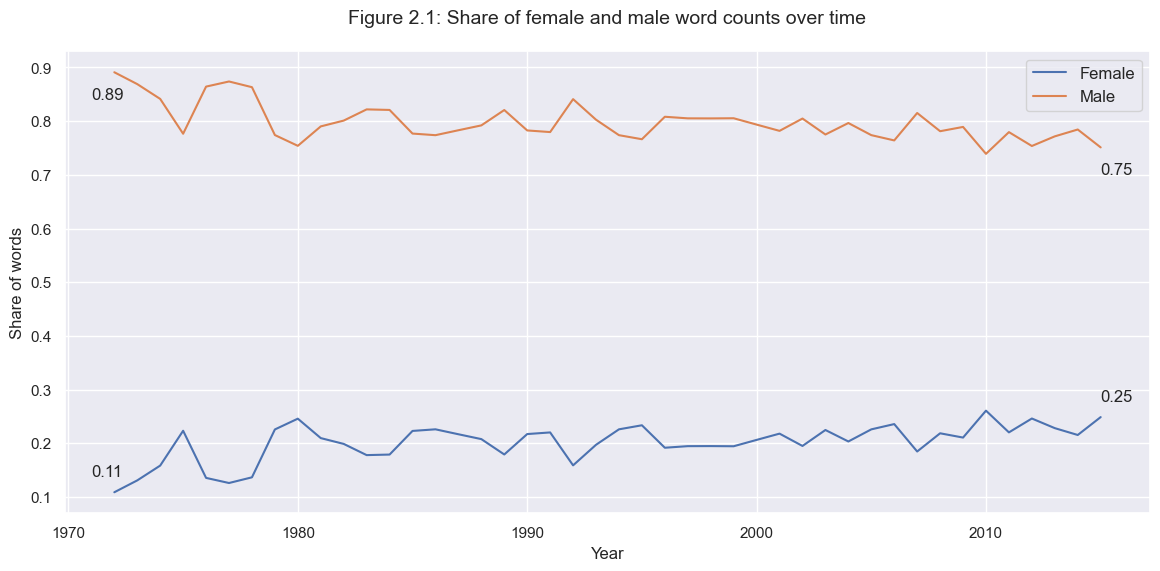

In [57]:
# Create lineplot of share of words over all years

# Filter out years until we have a continuous time series
df_share_by_year_filtered = df_share_by_year.loc[df_share_by_year["Year"] > 1968]

# plot data
plt.figure(figsize=(14, 6))
plt.plot(
    df_share_by_year_filtered["Year"],
    df_share_by_year_filtered["Female word share"],
)

plt.plot(
    df_share_by_year_filtered["Year"],
    df_share_by_year_filtered["Male word share"],
)

# Plot start and end values
female_1972 = df_share_by_year_filtered["Female word share"].iloc[0]
female_2015 = df_share_by_year_filtered["Female word share"].iloc[-1]
male_1972 = df_share_by_year_filtered["Male word share"].iloc[0]
male_2015 = df_share_by_year_filtered["Male word share"].iloc[-1]

plt.annotate(str(round(female_1972, 2)), xy=(1971, female_1972 + 0.03))
plt.annotate(str(round(female_2015, 2)), xy=(2015, female_2015 + 0.03))
plt.annotate(str(round(male_1972, 2)), xy=(1971, male_1972 - 0.05))
plt.annotate(str(round(male_2015, 2)), xy=(2015, male_2015 - 0.05))

# Format the chart
plt.title(
    "Figure 2.1: Share of female and male word counts over time", fontsize=14, pad=20
)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Share of words", fontsize=12)
plt.legend(["Female", "Male"], fontsize=12)

print()
plt.show()

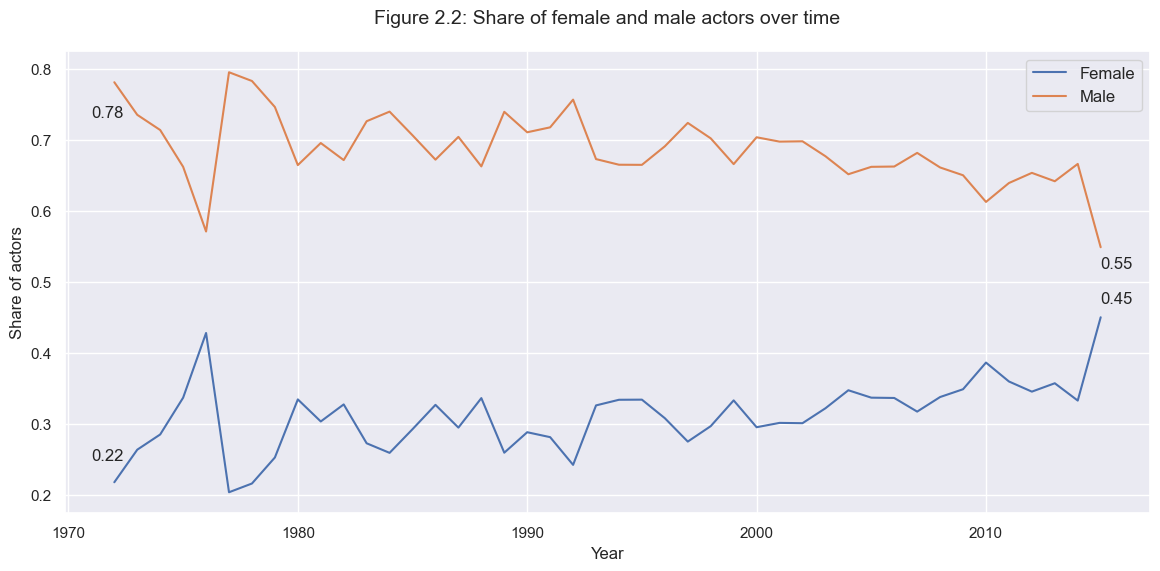

In [68]:
# Create lineplot of share of actors over all years

# Filter out years until we have a continuous time series
df_share_by_year_filtered = df_share_by_year.loc[df_share_by_year["Year"] > 1968]

# plot data
plt.figure(figsize=(14, 6))
plt.plot(
    df_share_by_year_filtered["Year"],
    df_share_by_year_filtered["Female actor share"],
)
plt.plot(
    df_share_by_year_filtered["Year"],
    df_share_by_year_filtered["Male actor share"],
)

# Plot start and end values
female_1972 = df_share_by_year_filtered["Female actor share"].iloc[0]
female_2015 = df_share_by_year_filtered["Female actor share"].iloc[-1]
male_1972 = df_share_by_year_filtered["Male actor share"].iloc[0]
male_2015 = df_share_by_year_filtered["Male actor share"].iloc[-1]

plt.annotate(str(round(female_1972, 2)), xy=(1971, female_1972 + 0.03))
plt.annotate(str(round(female_2015, 2)), xy=(2015, female_2015 + 0.02))
plt.annotate(str(round(male_1972, 2)), xy=(1971, male_1972 - 0.05))
plt.annotate(str(round(male_2015, 2)), xy=(2015, male_2015 - 0.03))

# Format the chart
plt.title("Figure 2.2: Share of female and male actors over time", fontsize=14, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Share of actors", fontsize=12)
plt.legend(["Female", "Male"], fontsize=12)

print()
plt.show()

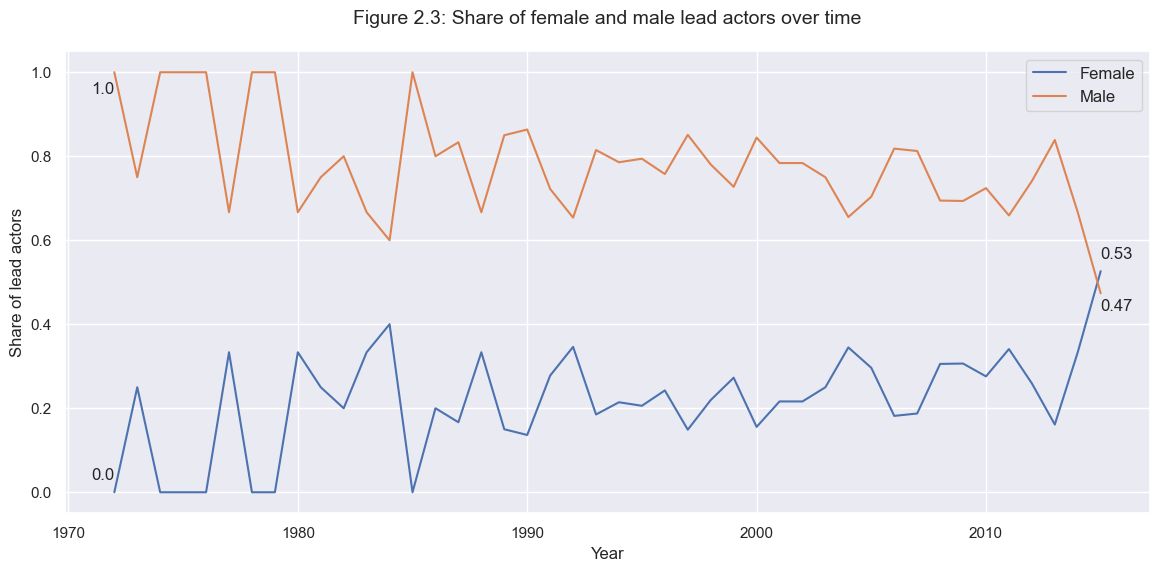

In [67]:
# Create lineplot of share of lead actors over all years

# Filter out years until we have a continuous time series
df_share_by_year_filtered = df_share_by_year.loc[df_share_by_year["Year"] > 1968]

# plot data
plt.figure(figsize=(14, 6))
plt.plot(
    df_share_by_year_filtered["Year"],
    df_share_by_year_filtered["Female lead share"],
)
plt.plot(
    df_share_by_year_filtered["Year"],
    df_share_by_year_filtered["Male lead share"],
)

# Plot start and end values
female_1972 = df_share_by_year_filtered["Female lead share"].iloc[0]
female_2015 = df_share_by_year_filtered["Female lead share"].iloc[-1]
male_1972 = df_share_by_year_filtered["Male lead share"].iloc[0]
male_2015 = df_share_by_year_filtered["Male lead share"].iloc[-1]

plt.annotate(str(round(female_1972, 2)), xy=(1971, female_1972 + 0.03))
plt.annotate(str(round(female_2015, 2)), xy=(2015, female_2015 + 0.03))
plt.annotate(str(round(male_1972, 2)), xy=(1971, male_1972 - 0.05))
plt.annotate(str(round(male_2015, 2)), xy=(2015, male_2015 - 0.04))

# Format the chart
plt.title(
    "Figure 2.3: Share of female and male lead actors over time", fontsize=14, pad=20
)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Share of lead actors", fontsize=12)
plt.legend(["Female", "Male"], fontsize=12)

print()
plt.show()

In [65]:
# Calculate average per decade

df_share_by_year["Decade"] = df_share_by_year["Year"].astype(str).str[:3] + "0s"

df_word_share_by_decade = pd.DataFrame(
    df_share_by_year.groupby("Decade")["Female word share"].mean().reset_index()
)

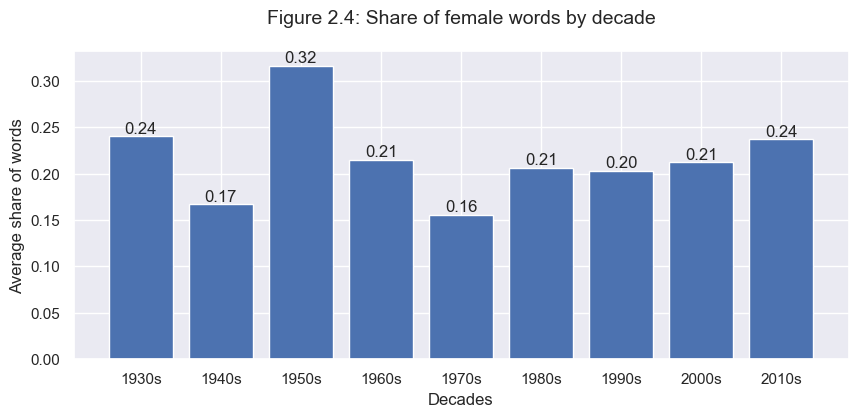

In [71]:
# Visualize the same data with a histogram

plt.figure(figsize=(10, 4))
p1 = plt.bar(
    df_word_share_by_decade["Decade"], df_word_share_by_decade["Female word share"]
)

# Format the chart
plt.title(
    "Figure 2.4: Share of female words by decade",
    fontsize=14,
    pad=20,
)
plt.xlabel("Decades", fontsize=12)
plt.ylabel("Average share of words", fontsize=12)
plt.bar_label(p1, label_type="edge", fmt="%.2f")

print()
plt.show()

### Question 3: Do films in which men do more speaking make a lot more money than films in which women speak more?

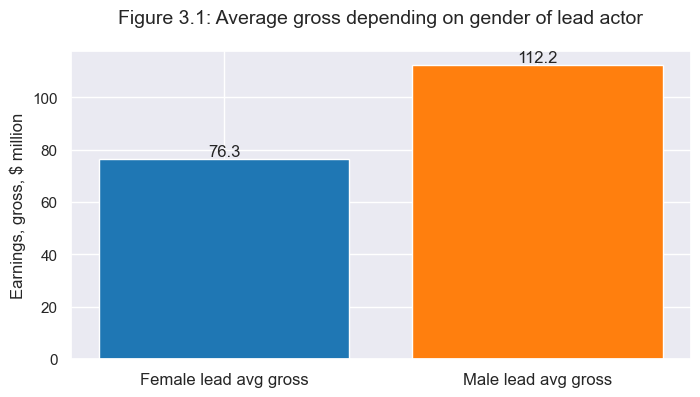

In [74]:
# Gross for movies with male and female lead roles

# Calculate average gross depending on female / male lead of years >= 1980
after1980 = df_actors.loc[df_actors['Year']>= 1980]

avg_gross_male_lead = after1980.loc[after1980['Lead']== 'Male']["Gross"].mean()
avg_gross_female_lead = after1980.loc[after1980['Lead']== 'Female']["Gross"].mean()

# Create bar chart
plt.figure(figsize=(8, 4))
p1 = plt.bar(
    ["Female lead avg gross", "Male lead avg gross"],
    [avg_gross_female_lead, avg_gross_male_lead],
    color=["tab:blue", "tab:orange"],
)
plt.title(
    "Figure 3.1: Average gross depending on gender of lead actor",
    fontsize=14,
    pad=20,
)
plt.xticks(fontsize=12)
plt.bar_label(p1, label_type="edge", fmt="%.1f")
plt.ylabel("Earnings gross, $ million", fontsize=12)

print()
plt.show()

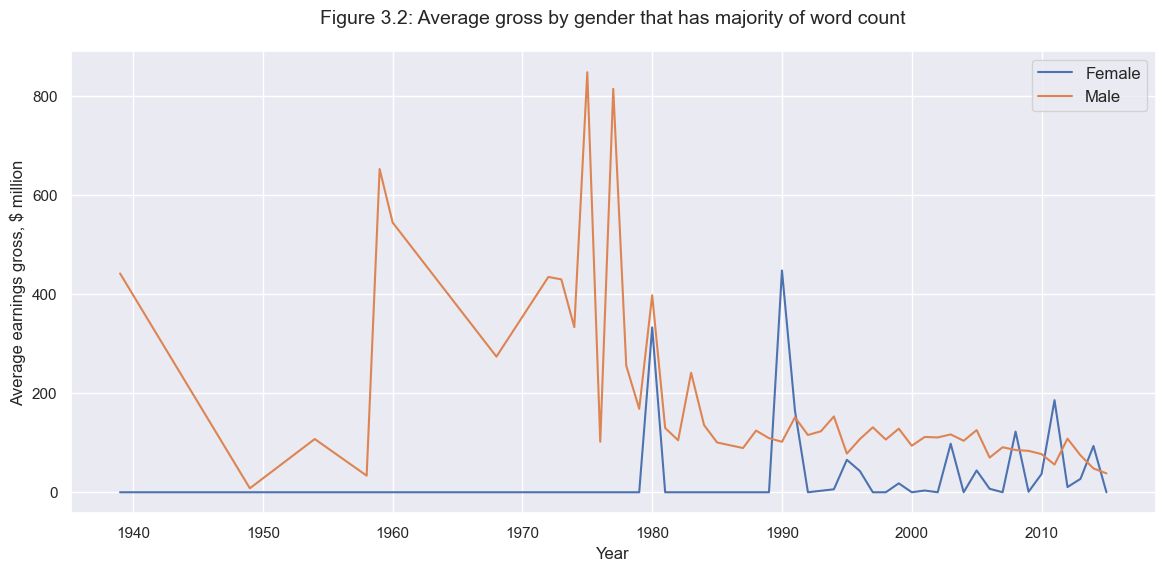

In [76]:
# The same view but over time

df_avg_gross_male_year = pd.DataFrame(
    df_actors.loc[df_actors["Male word share"] > df_actors["Female word share"]]
    .groupby("Year")["Gross"]
    .mean()
    .reset_index()
    .rename(columns={"Gross": "Male avg gross"})
)

df_avg_gross_female_year = pd.DataFrame(
    df_actors.loc[df_actors["Male word share"] < df_actors["Female word share"]]
    .groupby("Year")["Gross"]
    .mean()
    .reset_index()
    .rename(columns={"Gross": "Female avg gross"})
)

df_avg_gross_gender_year = df_avg_gross_male_year.join(
    df_avg_gross_female_year.set_index("Year"), on="Year"
).fillna(0)

# Filter out years until we have a continuous time series
df_share_by_year_filtered = df_avg_gross_gender_year.loc[
    df_share_by_year["Year"] > 1968
]

# plot data
plt.figure(figsize=(14, 6))
plt.plot(
    df_avg_gross_gender_year["Year"],
    df_avg_gross_gender_year["Female avg gross"],
)
plt.plot(
    df_avg_gross_gender_year["Year"],
    df_avg_gross_gender_year["Male avg gross"],
)

# Format the chart
plt.title(
    "Figure 3.2: Average gross by gender that has majority of word count",
    fontsize=14,
    pad=20,
)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average earnings gross, $ million", fontsize=12)
plt.legend(["Female", "Male"], fontsize=12)

print()
plt.show()

### Analysis of relationship between features and classes

Analysis conducted as input to the modeling. Goal is to understand distribution of different features and which ones can be significant for modeling.

#### Class-dependent feature distribution: Histograms and boxplots

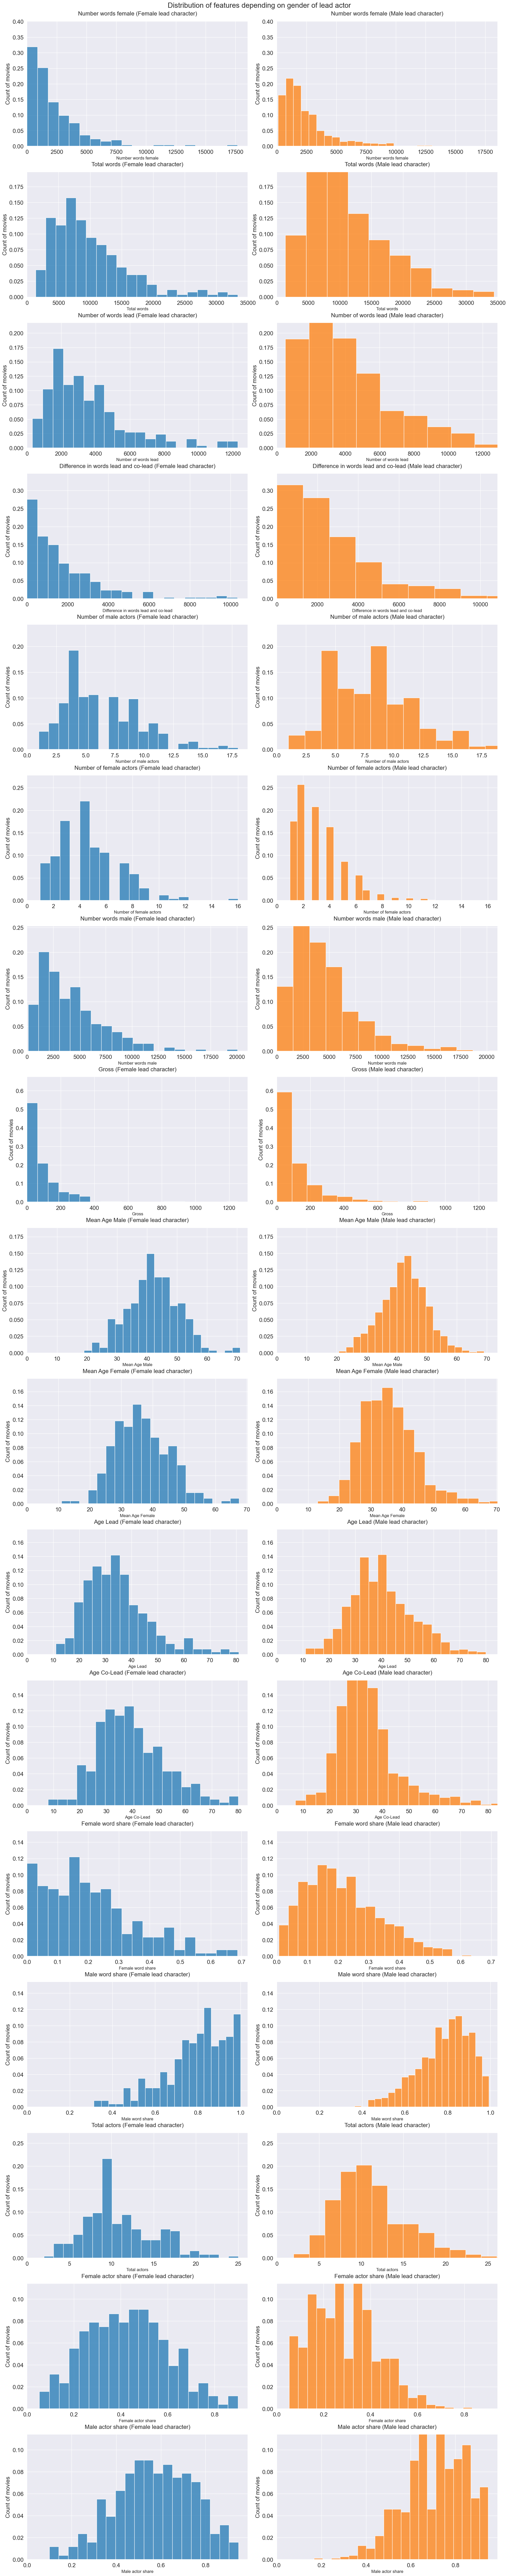

In [94]:
df_female = df_actors.loc[df_actors["Lead numeric"] == 0]
df_male = df_actors.loc[df_actors["Lead numeric"] == 1]
features = [
    col for col in df_actors.columns if col not in ("Lead", "Lead numeric", "Year")
]

fig, axes = plt.subplots(len(features), 2, figsize=(20, 100))
fig.tight_layout(pad=4)

row_index = 0
col_index = 0

for col in features:

    sns.histplot(
        data=df_female[col],
        bins=20,
        color="tab:blue",
        stat="probability",
        ax=axes[row_index, col_index],
    )
    axes[row_index, col_index].set_title(
        f"{col} (Female lead character)", fontsize=16, pad=16
    )

    y_lim_1 = axes[row_index, col_index].get_ylim()
    x_lim_1 = axes[row_index, col_index].get_xlim()

    col_index += 1

    sns.histplot(
        data=df_male[col],
        bins=20,
        color="tab:orange",
        stat="probability",
        ax=axes[row_index, col_index],
    )
    axes[row_index, col_index].set_title(
        f"{col} (Male lead character)", fontsize=16, pad=16
    )

    y_lim_2 = axes[row_index, col_index].get_ylim()
    x_lim_2 = axes[row_index, col_index].get_xlim()

    y_max = np.max(np.array(y_lim_1, y_lim_2))
    x_max = np.max(np.array(x_lim_1, x_lim_2))

    # Format plot 1
    axes[row_index, col_index - 1].xaxis.set_tick_params(labelsize=16)
    axes[row_index, col_index - 1].yaxis.set_tick_params(labelsize=16)
    axes[row_index, col_index - 1].set_ylabel("Count of movies", fontsize=16)
    axes[row_index, col_index - 1].set_xlim([0, x_max])
    axes[row_index, col_index - 1].set_ylim([0, y_max * 1.2])

    # Format plot 2
    axes[row_index, col_index].xaxis.set_tick_params(labelsize=16)
    axes[row_index, col_index].yaxis.set_tick_params(labelsize=16)
    axes[row_index, col_index].set_ylabel("Count of movies", fontsize=16)
    axes[row_index, col_index].set_xlim([0, x_max])
    axes[row_index, col_index].set_ylim([0, y_max * 1.2])

    col_index = 0
    row_index += 1

fig.suptitle(
    "Distribution of features depending on gender of lead actor", fontsize=20, y=1
)

print()
plt.show()

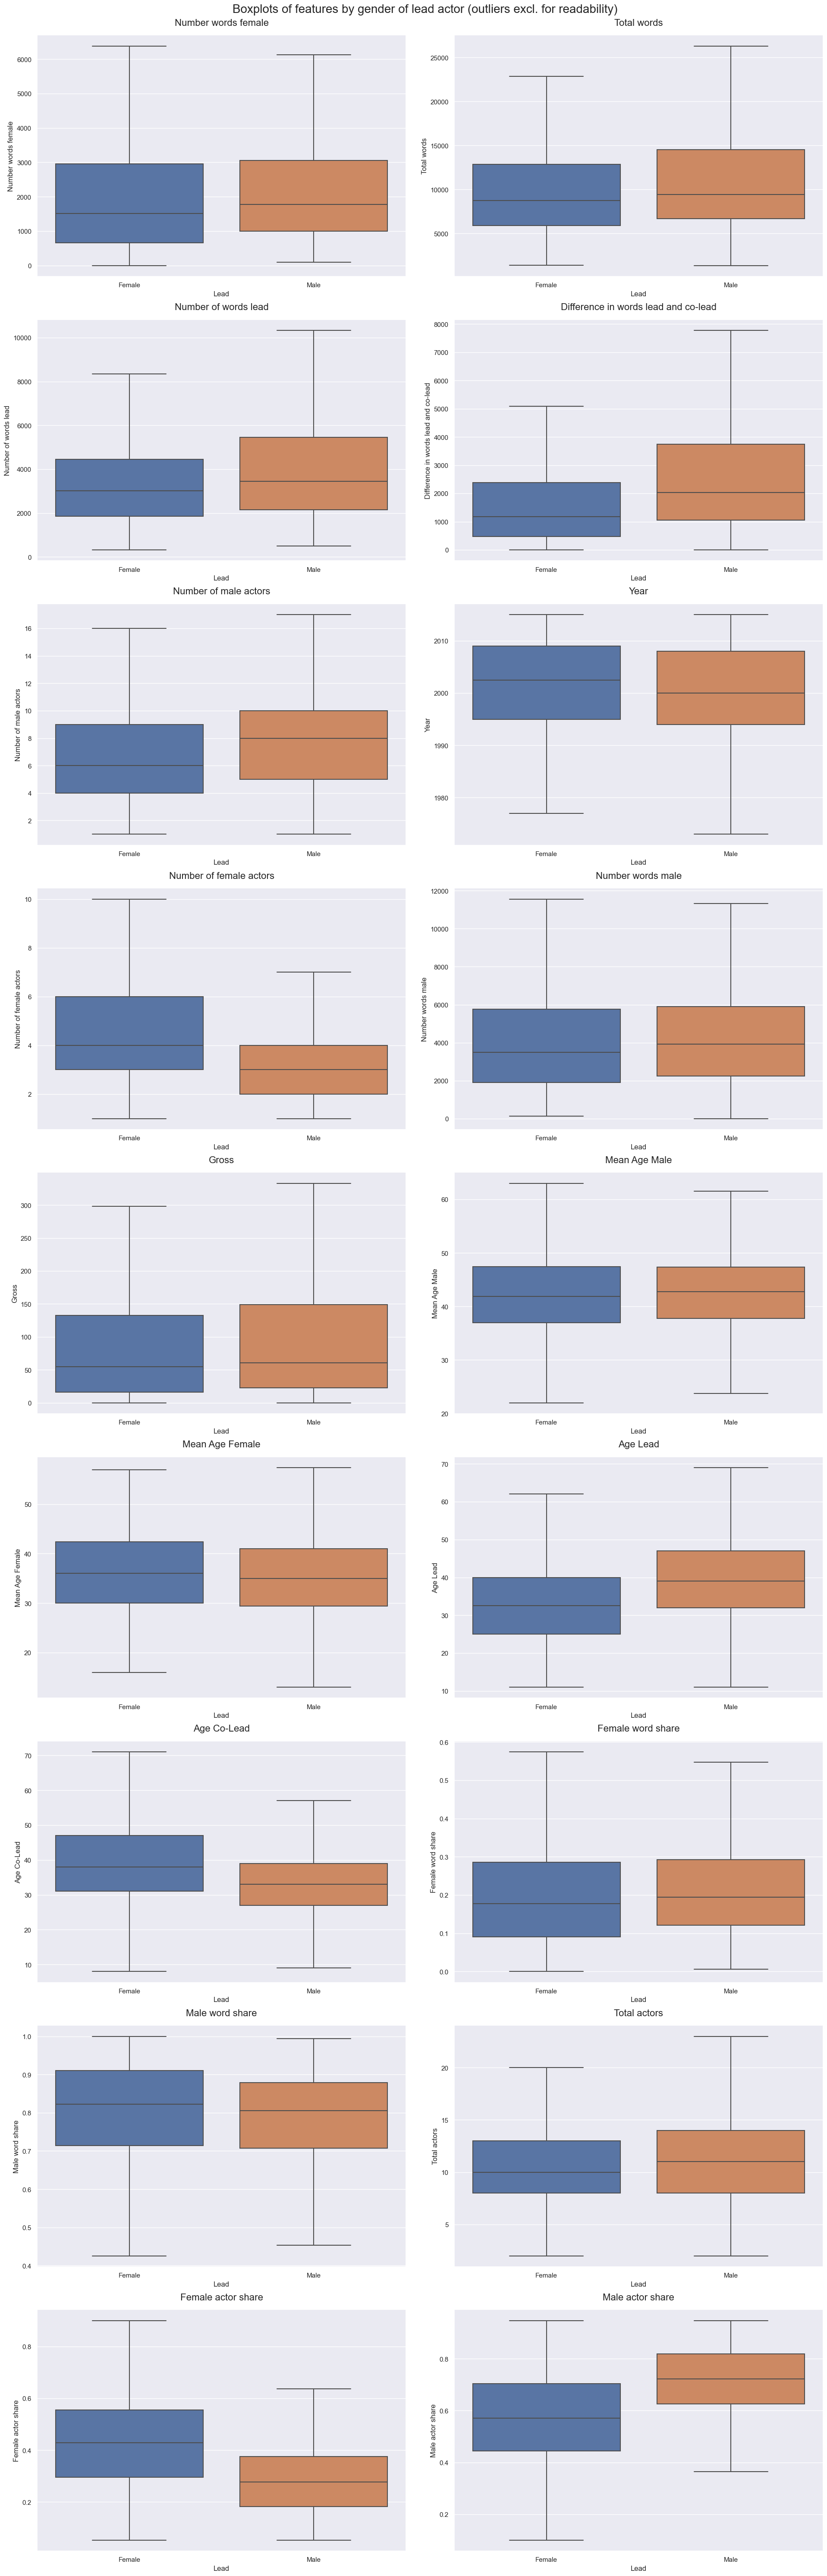

In [ ]:
df_female = df_actors.loc[df_actors["Lead numeric"] == 0]
df_male = df_actors.loc[df_actors["Lead numeric"] == 1]
features = [col for col in df_actors.columns if col not in ("Lead", "Lead numeric")]

fig, axes = plt.subplots(len(features) // 2, 2, figsize=(20, 60))
fig.tight_layout(pad=4)

row_index = 0
col_index = 0

for col in features:

    sns.boxplot(
        data=df_actors, x="Lead", y=col, showfliers=False, ax=axes[row_index, col_index]
    )
    axes[row_index, col_index].set_title(f"{col}", fontsize=16, pad=16)

    col_index += 1

    if col_index == 2:
        col_index = 0
        row_index += 1

fig.suptitle(
    "Boxplots of features by gender of lead actor (outliers excl. for readability)",
    fontsize=20,
    y=1,
)

print()
plt.show()

#### Initial hypotheses about feature importance from manual inspection

The following features seem to be most discriminating between male and female:
- Number of words lead
- Difference in words lead and co-lead
- Number of female actors
- Number of male actors
- Age lead
- Age co-lead

These could have some explanatory power, but less than above
- Number words female
- Total words
- Year

### Permutation testing: Hypothesis test of equal distribution

Why? We don't know if the data is normally distributed (t-test), so this way, we do not make any assumption about the data.

We are using a Monte Carlo method to do permutation testing

Based on: https://haneulkim.medium.com/monte-carlo-method-permutation-test-99e2a9c46f52

In [6]:
is_female = df_actors["Lead"] == "Female"
is_male = df_actors["Lead"] == "Male"

# split the data into female lead and male lead
df_movies_female = df_actors[is_female]
df_movies_male = df_actors[is_male]

In [11]:
def permutation_test(column):

    # print which column we are using
    print(df_movies_male.columns.values[column])
    # calculate the true difference of mean between the two distributions
    true_diff = (
        df_movies_male.iloc[:, column].mean() - df_movies_female.iloc[:, column].mean()
    )

    # now we randomly combine the different distributions into two new groups and sample from then to calculate their difference
    # multiple times
    a_n, b_n = len(df_movies_male.iloc[:, column]), len(
        df_movies_female.iloc[:, column]
    )
    # how many times we are sampling
    r = 10000
    combined = np.concatenate(
        [df_movies_male.iloc[:, column], df_movies_female.iloc[:, column]]
    )
    diff_list = list()

    for i in range(r):
        np.random.shuffle(combined)
        a_sample = combined[:a_n]
        b_sample = combined[a_n:]

        diff = a_sample.mean() - b_sample.mean()
        diff_list.append(diff)
    # compute mean of the different list and the standard deviation
    mean = np.mean(diff_list)
    std_dev = np.std(diff_list)

    # create a histogram to visualize the output
    n, bins, patches = plt.hist(diff_list, 50, density=True, facecolor="g", alpha=0.75)
    plt.axvline(true_diff, color="r")
    plt.show()
    print("True diff = ", true_diff)
    # 95% confidence interval
    print("Condidence Interval", [mean - 2 * std_dev, mean + 2 * std_dev])
    if true_diff > mean -2*std_dev and true_diff < mean + 2 * std_dev:
        print("The value lies WITHIN our Confidence interval. Therefore we cannot say anything with certainty, but the underlying distributions are not clearly different.")
    else:
        print("The value lies OUTSIDE our Confidence Interval and we therefore reject the null hypothesis, meaning that the samples most likely come from different distributions.")

Number words female


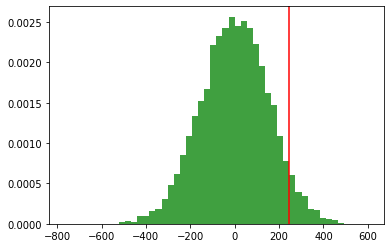

True diff =  245.1778825417523
Condidence Interval [-308.6316305029901, 308.55447501073877]
The value lies WITHIN our Confidence interval. Therefore we cannot say anything with certainty, but the underlying distributions are not clearly different.
Total words


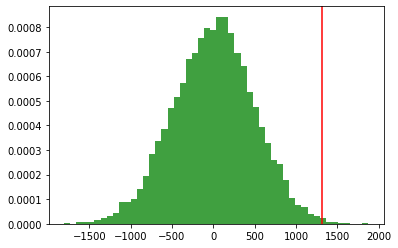

True diff =  1313.893535282612
Condidence Interval [-967.773001881769, 975.3921658318166]
The value lies OUTSIDE our Confidence Interval and we therefore reject the null hypothesis, meaning that the samples most likely come from different distributions.
Number of words lead


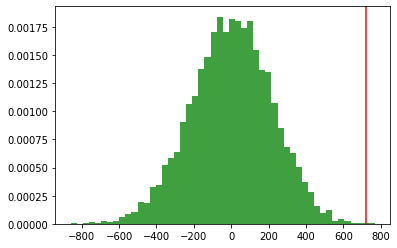

True diff =  721.361001053212
Condidence Interval [-431.0860716758738, 433.22871256959974]
The value lies OUTSIDE our Confidence Interval and we therefore reject the null hypothesis, meaning that the samples most likely come from different distributions.
Difference in words lead and co-lead


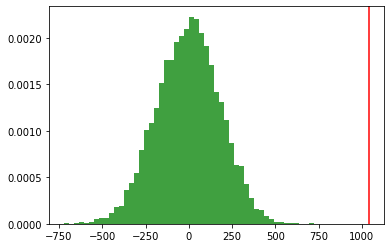

True diff =  1038.8182005115602
Condidence Interval [-366.41252542823986, 363.07651727437053]
The value lies OUTSIDE our Confidence Interval and we therefore reject the null hypothesis, meaning that the samples most likely come from different distributions.
Number of male actors


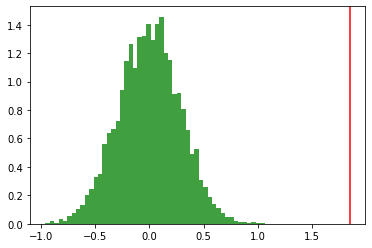

True diff =  1.8490295400972974
Condidence Interval [-0.5697699163016965, 0.5674455299232419]
The value lies OUTSIDE our Confidence Interval and we therefore reject the null hypothesis, meaning that the samples most likely come from different distributions.
Year


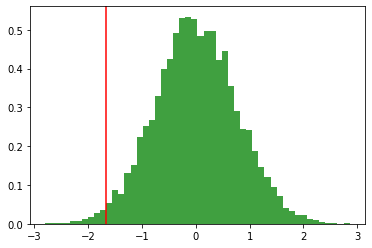

True diff =  -1.6620592808064885
Condidence Interval [-1.5048546071465043, 1.5223245013237443]
The value lies OUTSIDE our Confidence Interval and we therefore reject the null hypothesis, meaning that the samples most likely come from different distributions.
Number of female actors


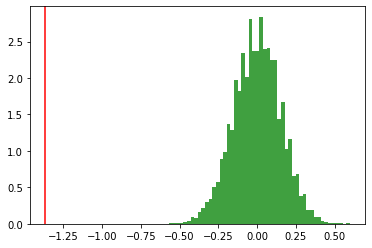

True diff =  -1.3661216710968453
Condidence Interval [-0.3011302169521569, 0.30210563096489573]
The value lies OUTSIDE our Confidence Interval and we therefore reject the null hypothesis, meaning that the samples most likely come from different distributions.
Number words male


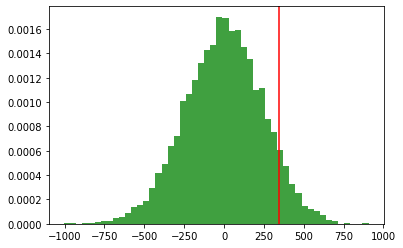

True diff =  347.3546516876477
Condidence Interval [-488.0185236489097, 487.52654576436186]
The value lies WITHIN our Confidence interval. Therefore we cannot say anything with certainty, but the underlying distributions are not clearly different.
Gross


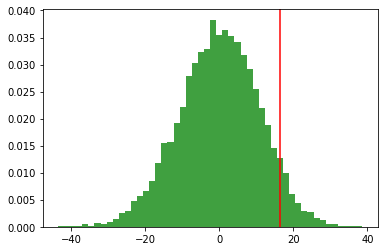

True diff =  16.418962836651787
Condidence Interval [-21.709679510479525, 21.632434313629133]
The value lies WITHIN our Confidence interval. Therefore we cannot say anything with certainty, but the underlying distributions are not clearly different.
Mean Age Male


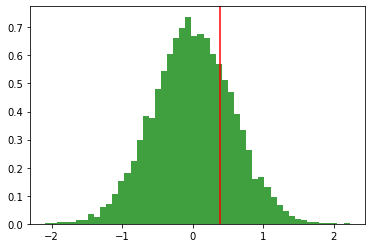

True diff =  0.38497197412917217
Condidence Interval [-1.1275103739632766, 1.1252347421954971]
The value lies WITHIN our Confidence interval. Therefore we cannot say anything with certainty, but the underlying distributions are not clearly different.
Mean Age Female


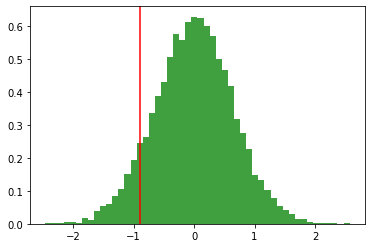

True diff =  -0.901289070554121
Condidence Interval [-1.297850524269908, 1.2863138460429824]
The value lies WITHIN our Confidence interval. Therefore we cannot say anything with certainty, but the underlying distributions are not clearly different.
Age Lead


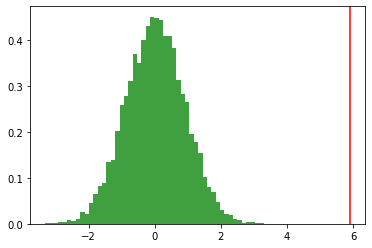

True diff =  5.892908370530122
Condidence Interval [-1.7720914547203575, 1.8003061425181408]
The value lies OUTSIDE our Confidence Interval and we therefore reject the null hypothesis, meaning that the samples most likely come from different distributions.
Age Co-Lead


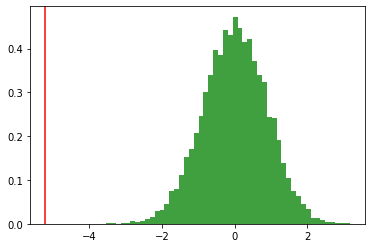

True diff =  -5.203310095792162
Condidence Interval [-1.7388577716437779, 1.7540782220174174]
The value lies OUTSIDE our Confidence Interval and we therefore reject the null hypothesis, meaning that the samples most likely come from different distributions.


In [12]:
# calling permutation test for all features

for i in range(0, (len(df_movies_male.columns.values) - 1)):
    permutation_test(i)

### Testing which features seem to be Gaussian

That the class-dependent feature vector is Gaussian is a key assumption for discriminant analysis. 

p-value < 0.05 means we reject the null hypothesis that the data is normally distributed, with 95% confidence.

#### Testing with data as is

In [116]:
df_female = df_actors.loc[df_actors["Lead numeric"] == 0]
df_male = df_actors.loc[df_actors["Lead numeric"] == 1]
features = [
    col for col in df_actors.columns if col not in ("Lead", "Lead numeric", "Year")
]

female_shapiro_dict = {}
for col in features:
    result = shapiro(df_female[col])
    female_shapiro_dict[col] = {
        "statistic": round(result.statistic, 3),
        "p-value": round(result.pvalue, 3),
    }

male_shapiro_dict = {}
for col in features:
    result = shapiro(df_male[col])
    male_shapiro_dict[col] = {
        "statistic": round(result.statistic, 3),
        "p-value": round(result.pvalue, 3),
    }

print("----- Shapiro-Wilk test for normal distribution of features -----\n")
print("----- Results for Female class -----\n")

for key in female_shapiro_dict.keys():
    print(key)
    print(female_shapiro_dict[key])

print("----- Results for Male class -----\n")
for key in male_shapiro_dict.keys():
    print(key)
    print(male_shapiro_dict[key])

----- Shapiro-Wilk test for normal distribution of features -----

----- Results for Female class -----

Number words female
{'statistic': 0.762, 'p-value': 0.0}
Total words
{'statistic': 0.9, 'p-value': 0.0}
Number of words lead
{'statistic': 0.871, 'p-value': 0.0}
Difference in words lead and co-lead
{'statistic': 0.795, 'p-value': 0.0}
Number of male actors
{'statistic': 0.943, 'p-value': 0.0}
Number of female actors
{'statistic': 0.933, 'p-value': 0.0}
Number words male
{'statistic': 0.887, 'p-value': 0.0}
Gross
{'statistic': 0.627, 'p-value': 0.0}
Mean Age Male
{'statistic': 0.993, 'p-value': 0.321}
Mean Age Female
{'statistic': 0.985, 'p-value': 0.009}
Age Lead
{'statistic': 0.94, 'p-value': 0.0}
Age Co-Lead
{'statistic': 0.977, 'p-value': 0.0}
Female word share
{'statistic': 0.943, 'p-value': 0.0}
Male word share
{'statistic': 0.943, 'p-value': 0.0}
Total actors
{'statistic': 0.968, 'p-value': 0.0}
Female actor share
{'statistic': 0.989, 'p-value': 0.057}
Male actor share
{'stat

#### Taking log of all features

In [133]:
features = [
    col for col in df_actors.columns if col not in ("Lead", "Lead numeric", "Year")
]

df_actors_log = df_actors.copy()

for column in features:
    df_actors_log[column] = np.log(df_actors_log[column]).replace([np.inf, -np.inf], 0)

df_female = df_actors_log.loc[df_actors["Lead numeric"] == 0]
df_male = df_actors_log.loc[df_actors["Lead numeric"] == 1]


female_shapiro_dict = {}
for col in features:
    result = shapiro(df_female[col])
    female_shapiro_dict[col] = {
        "statistic": round(result.statistic, 3),
        "p-value": round(result.pvalue, 3),
    }

male_shapiro_dict = {}
for col in features:
    result = shapiro(df_male[col])
    male_shapiro_dict[col] = {
        "statistic": round(result.statistic, 3),
        "p-value": round(result.pvalue, 3),
    }

print("----- Shapiro-Wilk test for normal distribution of features -----\n")
print("----- Results for Female class -----\n")

for key in female_shapiro_dict.keys():
    print(key)
    print(female_shapiro_dict[key])

print("----- Results for Male class -----\n")
for key in male_shapiro_dict.keys():
    print(key)
    print(male_shapiro_dict[key])

----- Shapiro-Wilk test for normal distribution of features -----

----- Results for Female class -----

Number words female
{'statistic': 0.695, 'p-value': 0.0}
Total words
{'statistic': 0.993, 'p-value': 0.304}
Number of words lead
{'statistic': 0.993, 'p-value': 0.258}
Difference in words lead and co-lead
{'statistic': 0.934, 'p-value': 0.0}
Number of male actors
{'statistic': 0.951, 'p-value': 0.0}
Number of female actors
{'statistic': 0.933, 'p-value': 0.0}
Number words male
{'statistic': 0.963, 'p-value': 0.0}
Gross
{'statistic': 0.957, 'p-value': 0.0}
Mean Age Male
{'statistic': 0.982, 'p-value': 0.003}
Mean Age Female
{'statistic': 0.981, 'p-value': 0.002}
Age Lead
{'statistic': 0.995, 'p-value': 0.61}
Age Co-Lead
{'statistic': 0.972, 'p-value': 0.0}
Female word share
{'statistic': 0.978, 'p-value': 0.001}
Male word share
{'statistic': 0.879, 'p-value': 0.0}
Total actors
{'statistic': 0.978, 'p-value': 0.0}
Female actor share
{'statistic': 0.934, 'p-value': 0.0}
Male actor shar